<a href="https://colab.research.google.com/github/gustavoramos82/Analise-Seguran-a-S-o-Paulo/blob/main/Notebooks/Compara%C3%A7%C3%A3o_pre%C3%A7o_dos_autom%C3%B3veis_com_roubo_de_automoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juntando o número de frotas com o furto de veiculos

Neste notebook será feito uma junção de dataframe para verificar se o crescimento de veiculos tem alguma relação com roubo

In [ ]:
!pip install basedosdados #instalando a blibioteca de onde vai retirar os dados

In [ ]:
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns

O dataset sobre a frota de veiculos pode ser encontrado no site do Ibge [aqui](https://cidades.ibge.gov.br/brasil/pesquisa/22/28120)

In [ ]:
frota = pd.read_csv('Frota de veículos - São Paulo.csv',delimiter=';')
frota.drop('Nível',axis=1,inplace=True)
frota.head()

,Indicador,2006,2007,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unidade
0,Veículo,15098096.0,16464703.0,19139118.0,20537980.0,21968359.0,23286890.0,24560202.0,25718248.0,26605042.0,27332101.0,28138698.0,29057749.0,30058975.0,30778960.0,31455473.0,32293191.0,veículos
1,Tipo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Automóvel,10294811.0,11014104.0,12536177.0,13334875.0,14108047.0,14880771.0,15643415.0,16319980.0,16834630.0,17247124.0,17719258.0,18230138.0,18753364.0,19089286.0,19305526.0,19632285.0,veículos
3,Bonde,83.0,79.0,53.0,49.0,44.0,29.0,27.0,26.0,26.0,25.0,24.0,24.0,24.0,24.0,24.0,24.0,veículos
4,Caminhão,490455.0,513029.0,557795.0,582761.0,609154.0,626913.0,643241.0,658713.0,664617.0,669056.0,672998.0,678933.0,688249.0,695695.0,704140.0,714124.0,veículos


In [ ]:
frota = frota.T # transformando o que é linha e coluna
frota.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Indicador,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,Ciclomotor,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,48621.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,48669.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,48744.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,48805.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN


In [ ]:
frota.reset_index(inplace=True) # resetando o index
frota.head()

,index,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,Indicador,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
1,2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2,2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
3,2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
4,2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN


In [ ]:
frota.columns = list(frota.iloc[0,:])
frota.head()

,Indicador,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
0,Indicador,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
1,2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2,2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
3,2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
4,2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN


In [ ]:
frota = frota.iloc[1:,:] #  so usando a partir da linha 1


In [ ]:
frota = frota.rename(columns={'Indicador':'Ano'})
frota.head()

,Ano,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
1,2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2,2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
3,2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
4,2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN
5,2011,21968359.0,NaN,14108047.0,44.0,609154.0,124667.0,1355274.0,776452.0,1231.0,...,57.0,213908.0,186245.0,1915.0,55.0,8922.0,2181.0,106796.0,1001.0,NaN


In [ ]:
frota.head()

,Ano,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
1,2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2,2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
3,2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
4,2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN
5,2011,21968359.0,NaN,14108047.0,44.0,609154.0,124667.0,1355274.0,776452.0,1231.0,...,57.0,213908.0,186245.0,1915.0,55.0,8922.0,2181.0,106796.0,1001.0,NaN


In [ ]:
frota

,Ano,Veículo,Tipo,Automóvel,Bonde,Caminhão,Caminhão trator,Caminhonete,Camioneta,Chassi plataforma,...,Quadriciclo,Reboque,Semi-reboque,Sidecar,Trator de esteira,Trator de rodas,Triciclo,Utilitário,Outros,NaN
1,2006,15098096.0,NaN,10294811.0,83.0,490455.0,71656.0,577068.0,799719.0,2211.0,...,55.0,155200.0,117312.0,1648.0,31.0,4914.0,767.0,21088.0,462.0,NaN
2,2007,16464703.0,NaN,11014104.0,79.0,513029.0,78728.0,737022.0,743996.0,2192.0,...,55.0,165741.0,128867.0,1805.0,34.0,5329.0,818.0,33988.0,336.0,NaN
3,2009,19139118.0,NaN,12536177.0,53.0,557795.0,96604.0,1108282.0,639500.0,1544.0,...,56.0,185794.0,153620.0,1890.0,41.0,6812.0,1250.0,66822.0,613.0,NaN
4,2010,20537980.0,NaN,13334875.0,49.0,582761.0,110929.0,1226218.0,699225.0,1366.0,...,57.0,198919.0,169719.0,1900.0,50.0,7847.0,1696.0,83228.0,837.0,NaN
5,2011,21968359.0,NaN,14108047.0,44.0,609154.0,124667.0,1355274.0,776452.0,1231.0,...,57.0,213908.0,186245.0,1915.0,55.0,8922.0,2181.0,106796.0,1001.0,NaN
6,2012,23286890.0,NaN,14880771.0,29.0,626913.0,134270.0,1470277.0,851860.0,1141.0,...,57.0,230255.0,199769.0,1916.0,58.0,9511.0,2762.0,128127.0,1154.0,NaN
7,2013,24560202.0,NaN,15643415.0,27.0,643241.0,146455.0,1583988.0,930126.0,791.0,...,57.0,249929.0,215771.0,1917.0,58.0,9882.0,3172.0,152404.0,1366.0,NaN
8,2014,25718248.0,NaN,16319980.0,26.0,658713.0,155801.0,1692250.0,999330.0,694.0,...,56.0,269368.0,227255.0,1915.0,58.0,10213.0,3539.0,178842.0,1623.0,NaN
9,2015,26605042.0,NaN,16834630.0,26.0,664617.0,159401.0,1763148.0,1055596.0,640.0,...,57.0,287870.0,232605.0,1913.0,58.0,10500.0,3993.0,202566.0,1930.0,NaN
10,2016,27332101.0,NaN,17247124.0,25.0,669056.0,162501.0,1825129.0,1105626.0,628.0,...,58.0,307126.0,236654.0,1914.0,58.0,10695.0,4476.0,225204.0,2093.0,NaN


In [ ]:
frota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ano                17 non-null     object
 1   Veículo            17 non-null     object
 2   Tipo               0 non-null      object
 3   Automóvel          17 non-null     object
 4   Bonde              17 non-null     object
 5   Caminhão           17 non-null     object
 6   Caminhão trator    17 non-null     object
 7   Caminhonete        17 non-null     object
 8   Camioneta          17 non-null     object
 9   Chassi plataforma  17 non-null     object
 10  Ciclomotor         17 non-null     object
 11  Micro-ônibus       17 non-null     object
 12  Motocicleta        17 non-null     object
 13  Motoneta           17 non-null     object
 14  Ônibus             17 non-null     object
 15  Quadriciclo        17 non-null     object
 16  Reboque            17 non-null     object
 17 

In [ ]:
frota.drop('Tipo',axis=1,inplace=True)
frota = frota[['Ano','Automóvel']]

In [ ]:
frota = frota.iloc[0:16]

In [ ]:
frota['Ano'] = frota['Ano'].astype(int)
frota['Automóvel'] = frota['Automóvel'].astype(int)

In [ ]:
frota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Ano        16 non-null     int64
 1   Automóvel  16 non-null     int64
dtypes: int64(2)
memory usage: 388.0 bytes


In [ ]:
frota

,Ano,Automóvel
1,2006,10294811
2,2007,11014104
3,2009,12536177
4,2010,13334875
5,2011,14108047
6,2012,14880771
7,2013,15643415
8,2014,16319980
9,2015,16834630
10,2016,17247124


In [ ]:
seg = bd.read_table(dataset_id='br_sp_gov_ssp',
table_id='ocorrencias_registradas',
billing_project_id="191635027716")
seg.head()

Downloading: 100%|██████████| 153876/153876 [00:26<00:00, 5739.90rows/s]


,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2006,1,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,16,0
1,2006,2,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,18,1
2,2006,3,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,0,<NA>,0,0,0,22,0
3,2006,4,3500105,Presidente Prudente,0,0,0,0,0,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,26,0
4,2006,5,3500105,Presidente Prudente,0,0,0,0,1,0,...,0,<NA>,<NA>,1,<NA>,0,0,0,17,1


In [ ]:
seg = seg.groupby(by='ano').sum().reset_index()
seg.head()

,ano,mes,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,tentativa_de_homicidio,lesao_corporal_seguida_de_morte,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,50154,11846,12531,0,0,4740,333,10168,0,...,3991,0,0,223579,0,84567,147,3676,463230,106814
1,2003,49920,10943,11498,0,0,4601,377,9852,0,...,3974,0,0,248289,0,79812,172,3870,537685,106256
2,2004,50076,8743,9353,0,0,4609,230,9367,0,...,3984,0,0,220172,0,79585,280,6211,559775,113673
3,2005,50232,7076,7593,0,0,4708,259,8188,0,...,3903,0,0,221816,0,79978,332,6222,564923,117568
4,2006,49998,6050,6552,0,0,4479,256,7022,0,...,3421,0,0,213394,0,72774,442,6025,551129,110985


In [ ]:
seg = seg[['ano','roubo_de_veiculo']]
seg.head()

,ano,roubo_de_veiculo
0,2002,84567
1,2003,79812
2,2004,79585
3,2005,79978
4,2006,72774


In [ ]:
len(seg[seg['ano']>2005]['roubo_de_veiculo'])

16

In [ ]:
frota = frota[frota['Ano']<2022]

In [ ]:
frota = frota.reset_index().drop('index',axis=1)
frota.drop('Roubo de Veículo',axis=1,inplace=True)
frota.head()

,Ano,Automóvel
0,2006,10294811
1,2007,11014104
2,2009,12536177
3,2010,13334875
4,2011,14108047


In [ ]:
frota['Roubo Automovel'] = seg[(seg['ano']>2005)&(seg['ano']!=2008)].reset_index().drop('index',axis=1)['roubo_de_veiculo']
frota.head()

,Ano,Automóvel,Roubo Automovel
0,2006,10294811,72774
1,2007,11014104,65187
2,2009,12536177,71837
3,2010,13334875,68585
4,2011,14108047,79190


In [ ]:
frota

,Ano,Automóvel,Roubo Automovel
0,2006,10294811,72774
1,2007,11014104,65187
2,2009,12536177,71837
3,2010,13334875,68585
4,2011,14108047,79190
5,2012,14880771,87175
6,2013,15643415,98726
7,2014,16319980,98761
8,2015,16834630,78633
9,2016,17247124,77933


In [ ]:
frota.corr()

,Ano,Automóvel,Roubo Automovel
Ano,1.000000,0.990491,-0.558690
Automóvel,0.990491,1.000000,-0.444723
Roubo Automovel,-0.558690,-0.444723,1.000000


In [ ]:
frota.corr(method='spearman')

,Ano,Automóvel,Roubo Automovel
Ano,1.000000,1.000000,-0.492857
Automóvel,1.000000,1.000000,-0.492857
Roubo Automovel,-0.492857,-0.492857,1.000000


Text(0, 0.5, '')

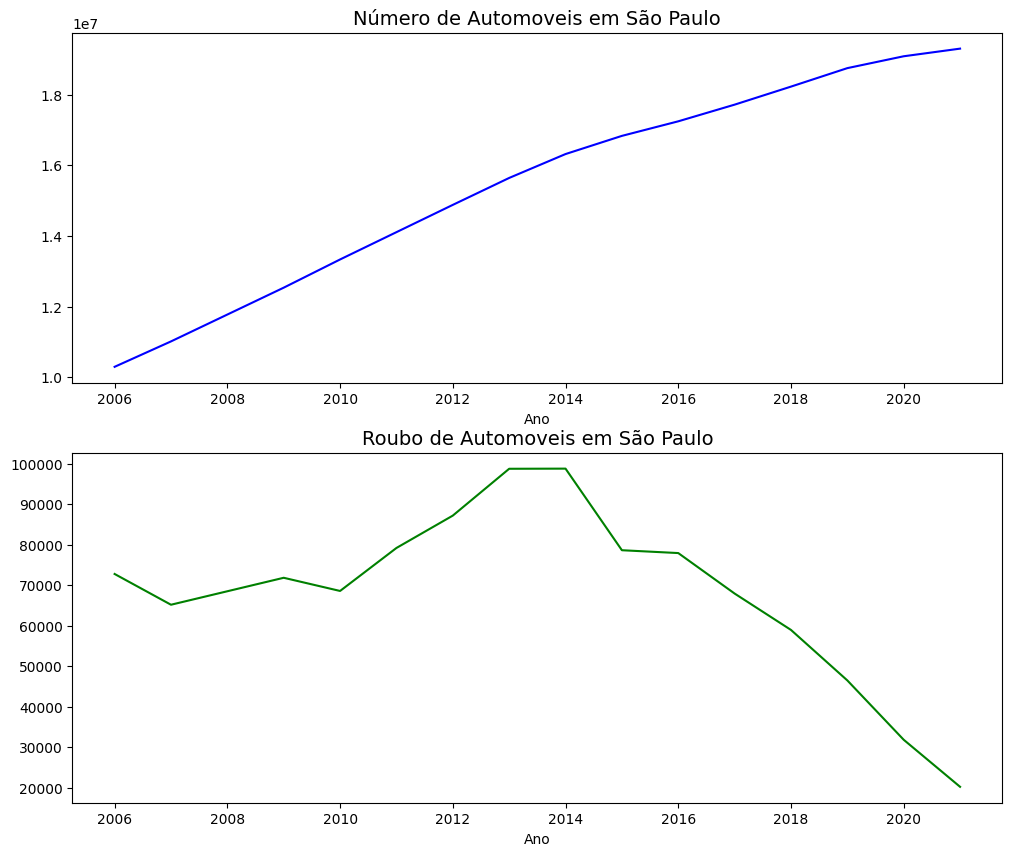

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)

plt.title('Número de Automoveis em São Paulo',fontsize=14)
sns.lineplot(x='Ano',y='Automóvel',data=frota,color='blue')
plt.xlabel('Ano')
plt.ylabel('')

plt.subplot(2,1,2)

plt.title('Roubo de Automoveis em São Paulo',fontsize=14)
sns.lineplot(x='Ano',y='Roubo Automovel',data=frota,color='green')
plt.xlabel('Ano')
plt.ylabel('')